ChurnGuard: Predictive Customer Churn Analysis with Logistic Regression, Random Forest Classifier, XGBoost and Decision Trees


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
import graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency


In [ ]:
# Load the dataset
df = pd.read_csv('ML Project 4.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Calculate basic statistics
basic_stats = df.describe()

# Print the calculated statistics
print(basic_stats)


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [ ]:
# Calculate statistics for specific columns
specific_stats = df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

# Print the statistics for specific columns
print(specific_stats)


            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


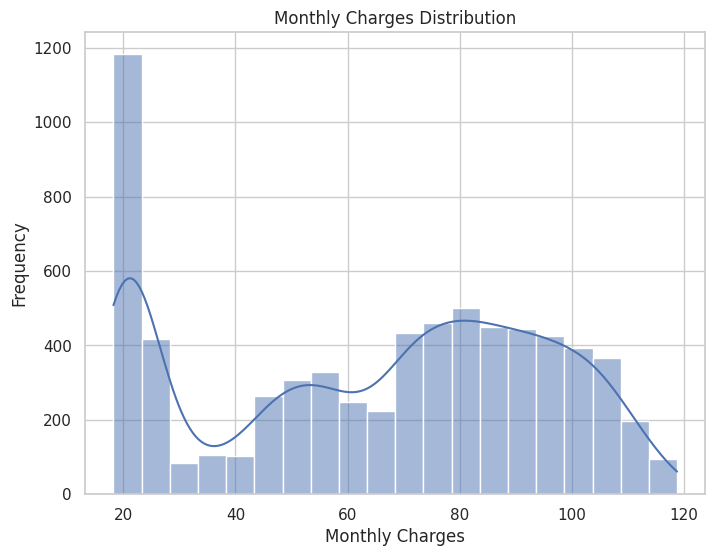

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a histogram of MonthlyCharges
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyCharges', bins=20, kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()



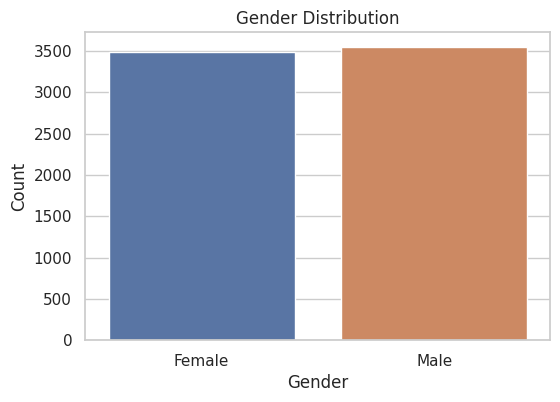

In [ ]:
# Create a bar plot of gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



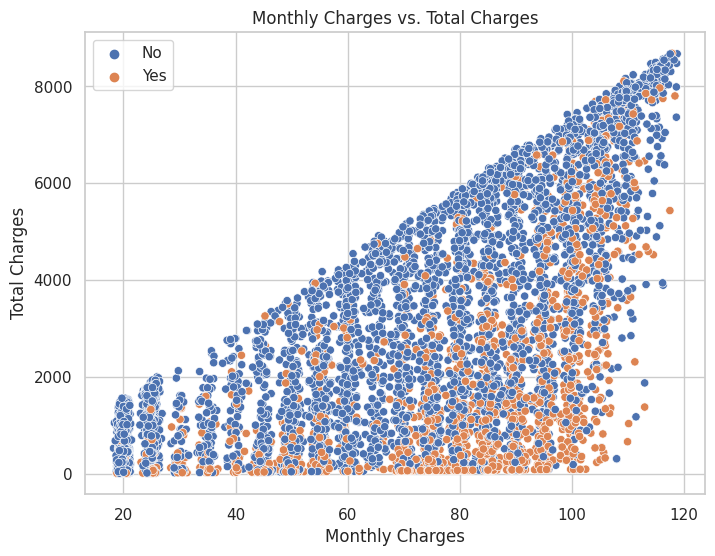

In [ ]:
# Create a scatter plot of MonthlyCharges vs. TotalCharges
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend()
plt.show()




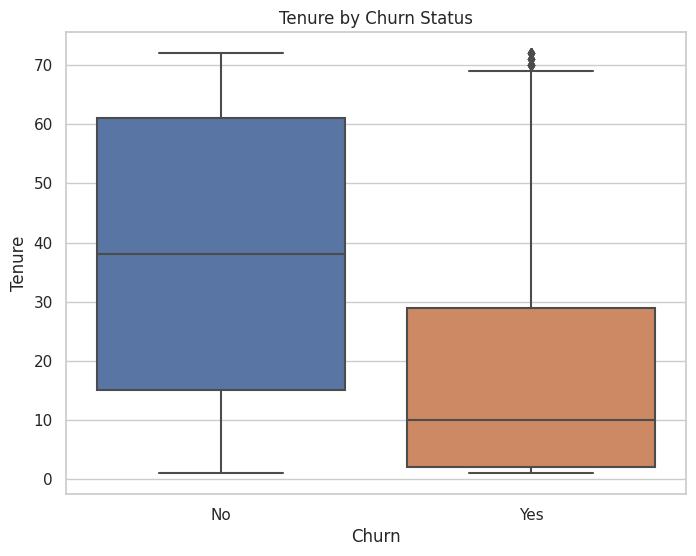

In [ ]:
# Create a box plot of tenure by Churn status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

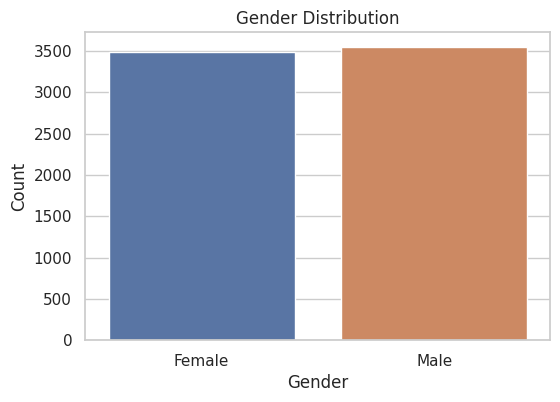

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a bar plot of gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()




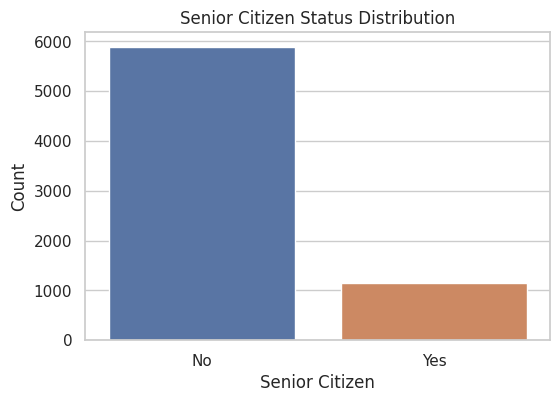

In [ ]:
# Create a bar plot of senior citizen status distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen')
plt.title('Senior Citizen Status Distribution')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Set x-axis labels
plt.show()

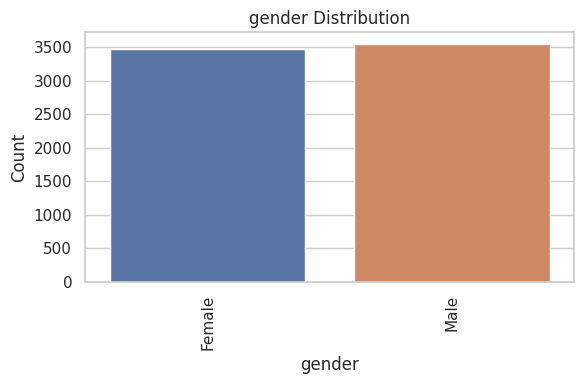

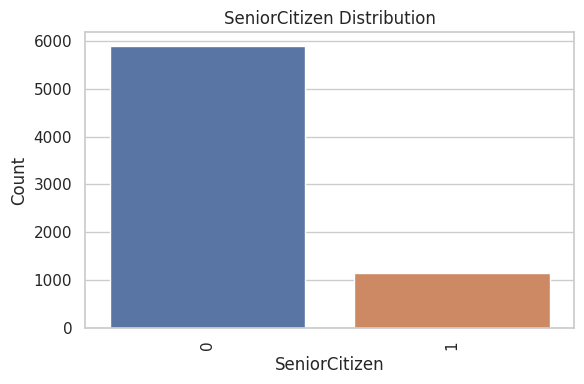

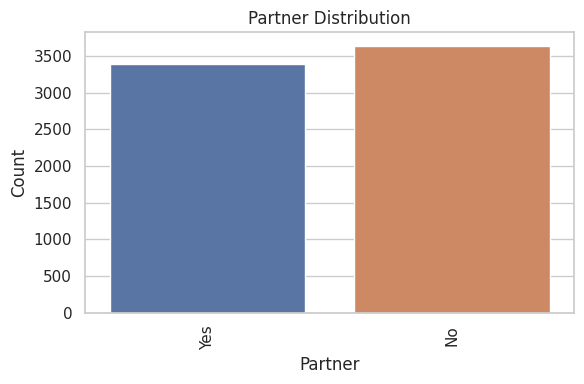

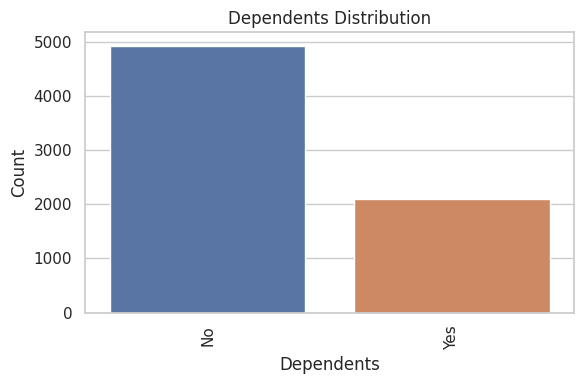

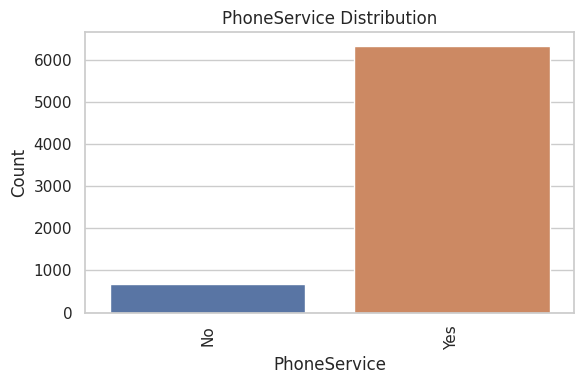

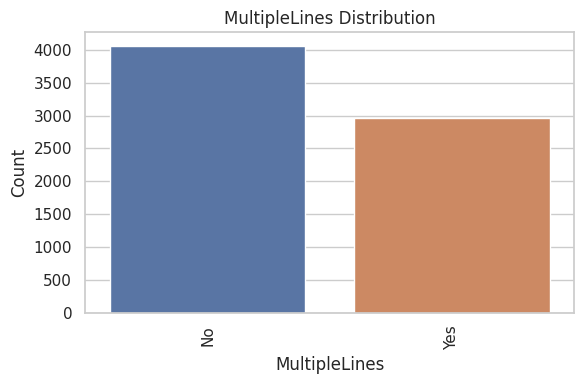

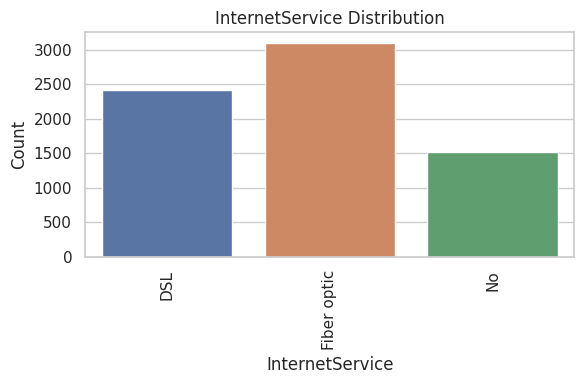

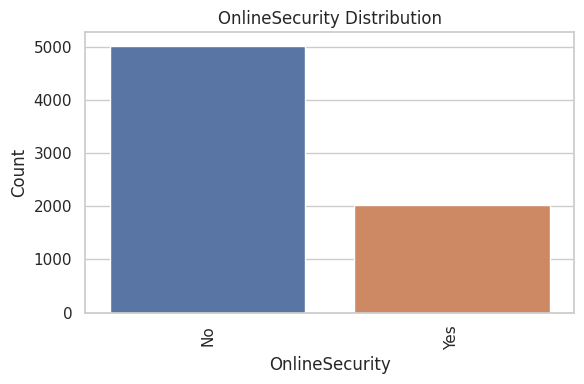

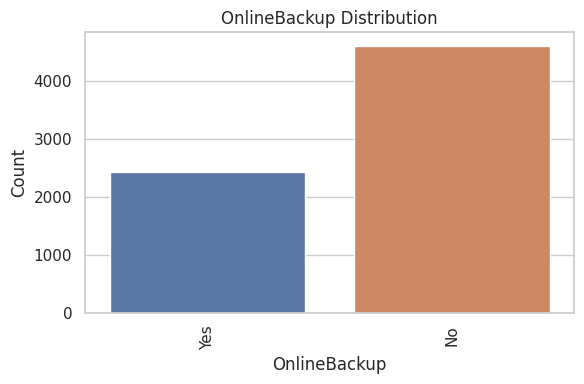

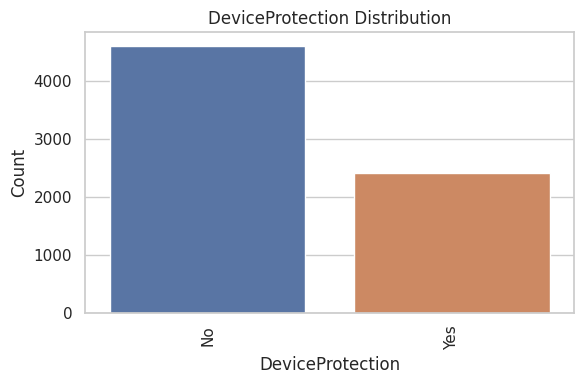

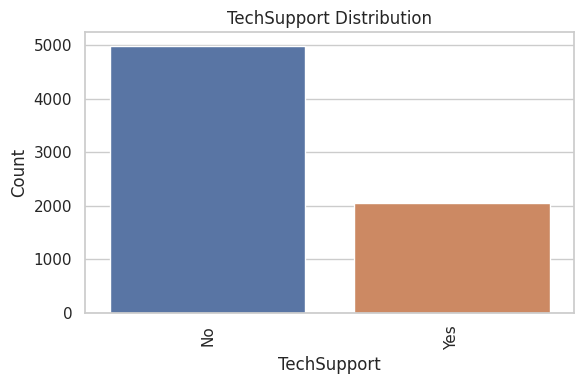

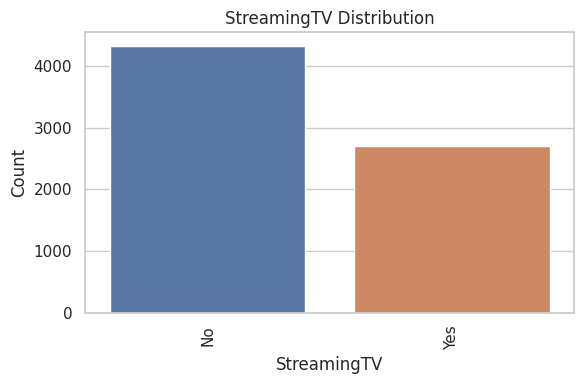

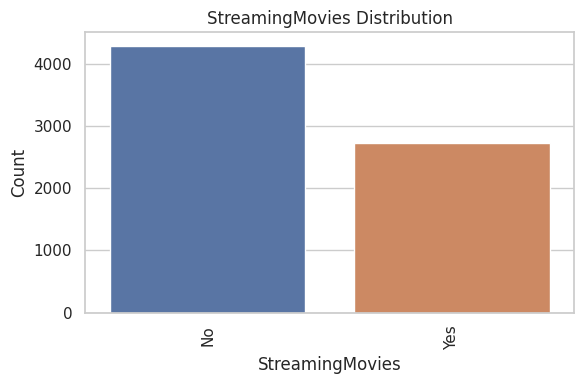

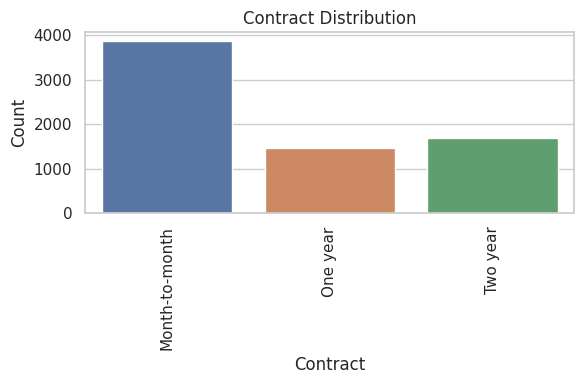

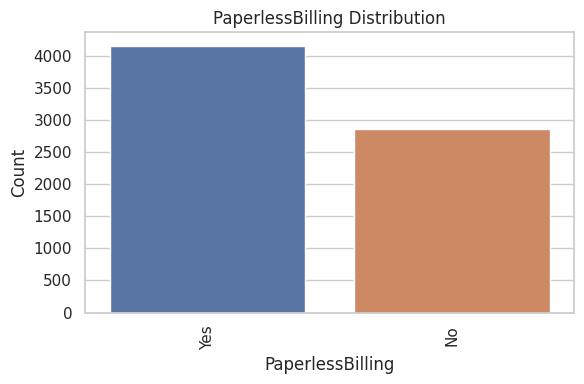

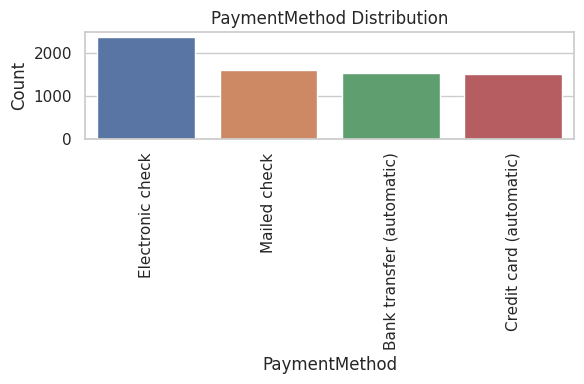

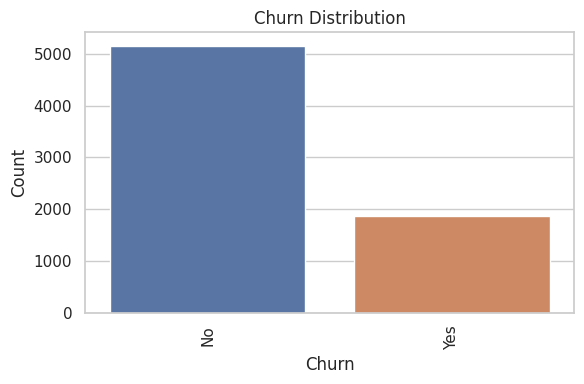

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# List of categorical column names
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Create bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Ensure plots don't overlap
    plt.show()


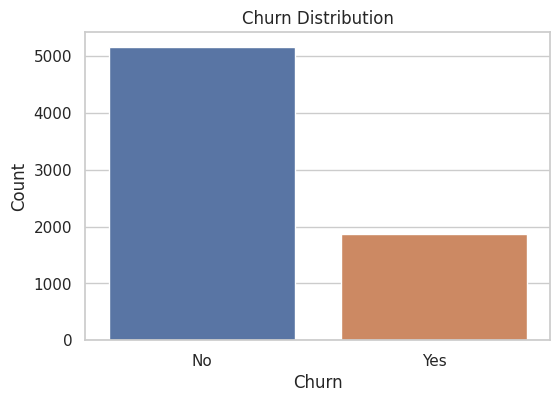

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a bar plot of churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


<ipython-input-13-88fb564d631d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


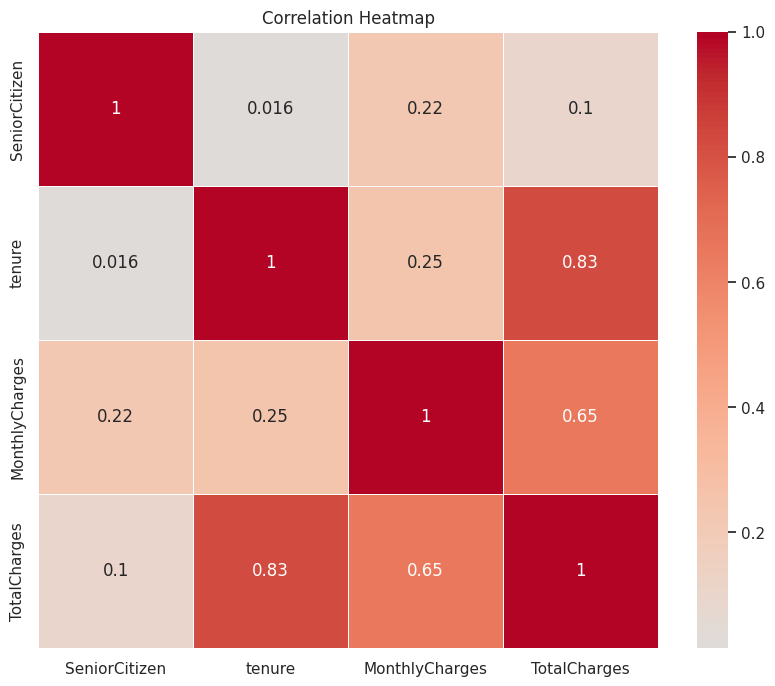

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


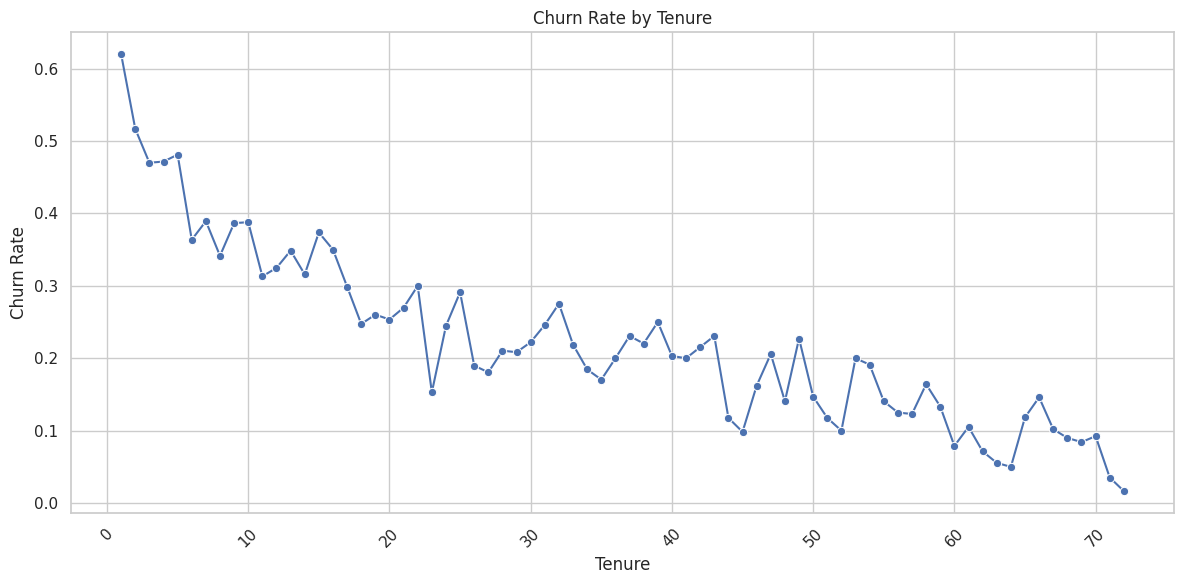

In [ ]:
# Convert 'Churn' column to numeric (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate churn rate by tenure
churn_by_tenure = df.groupby('tenure')['Churn'].mean()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a line plot of churn rate by tenure
sns.lineplot(x=churn_by_tenure.index, y=churn_by_tenure.values, marker='o')

plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


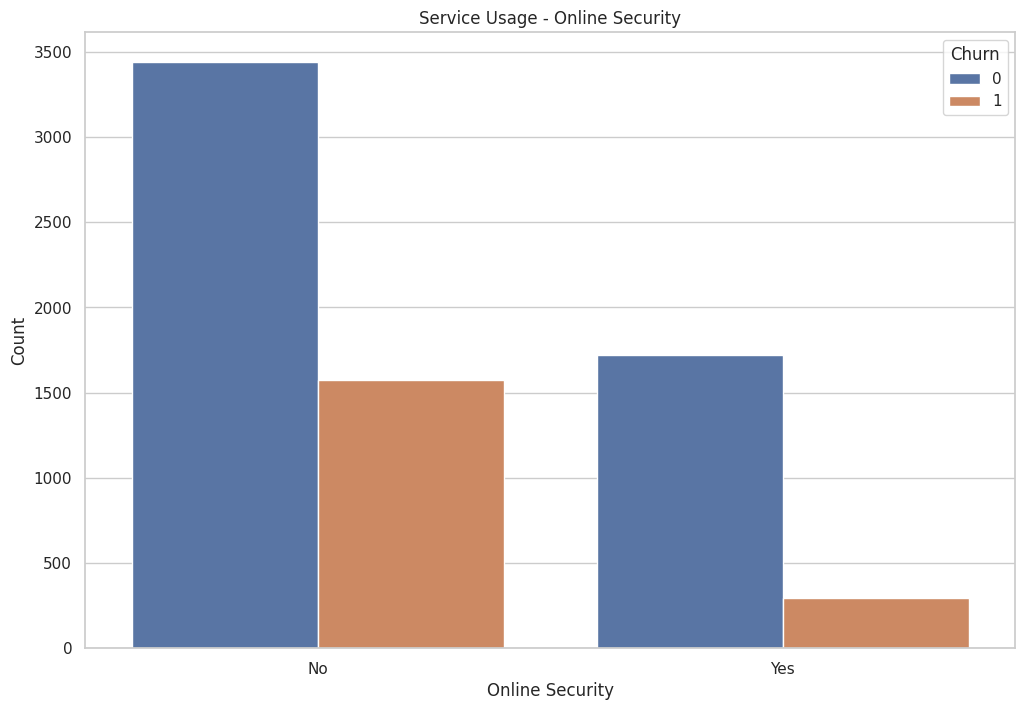

In [ ]:
# Select columns related to service usage
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
service_df = df[service_columns]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot of service usage distribution
sns.countplot(data=service_df, hue='Churn', x='OnlineSecurity')
plt.title('Service Usage - Online Security')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


<Figure size 1200x800 with 0 Axes>

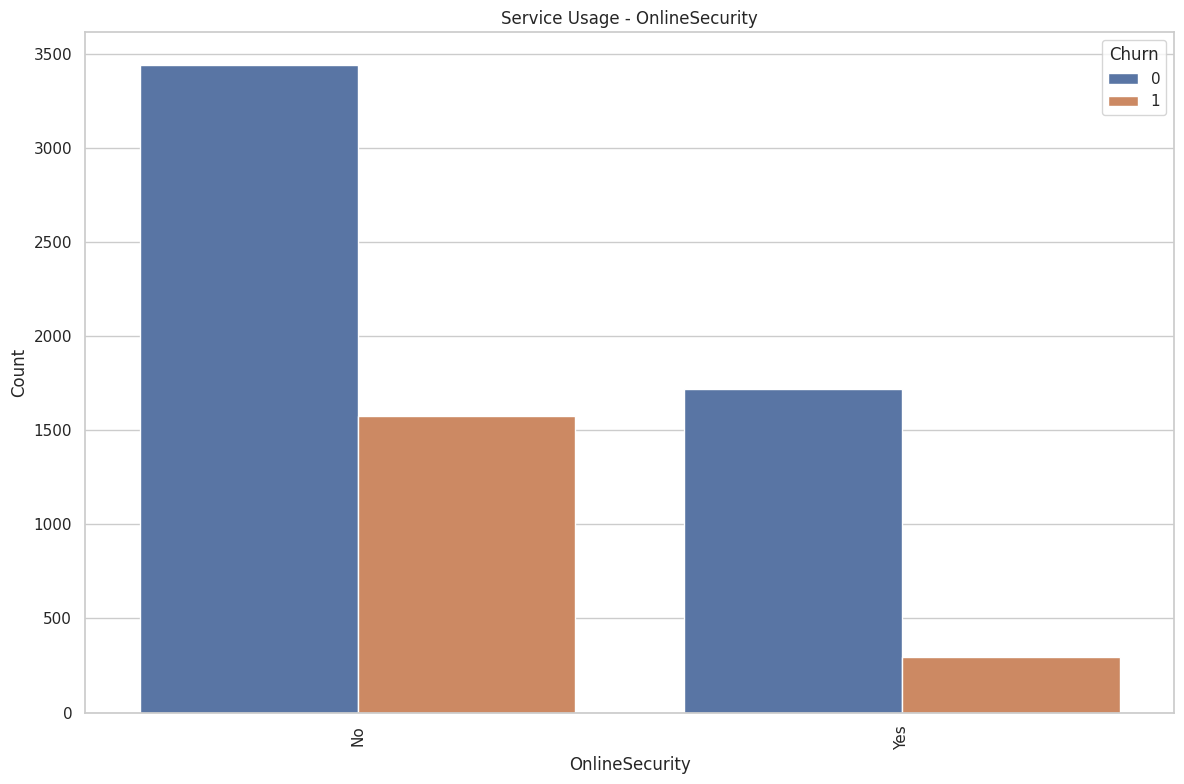

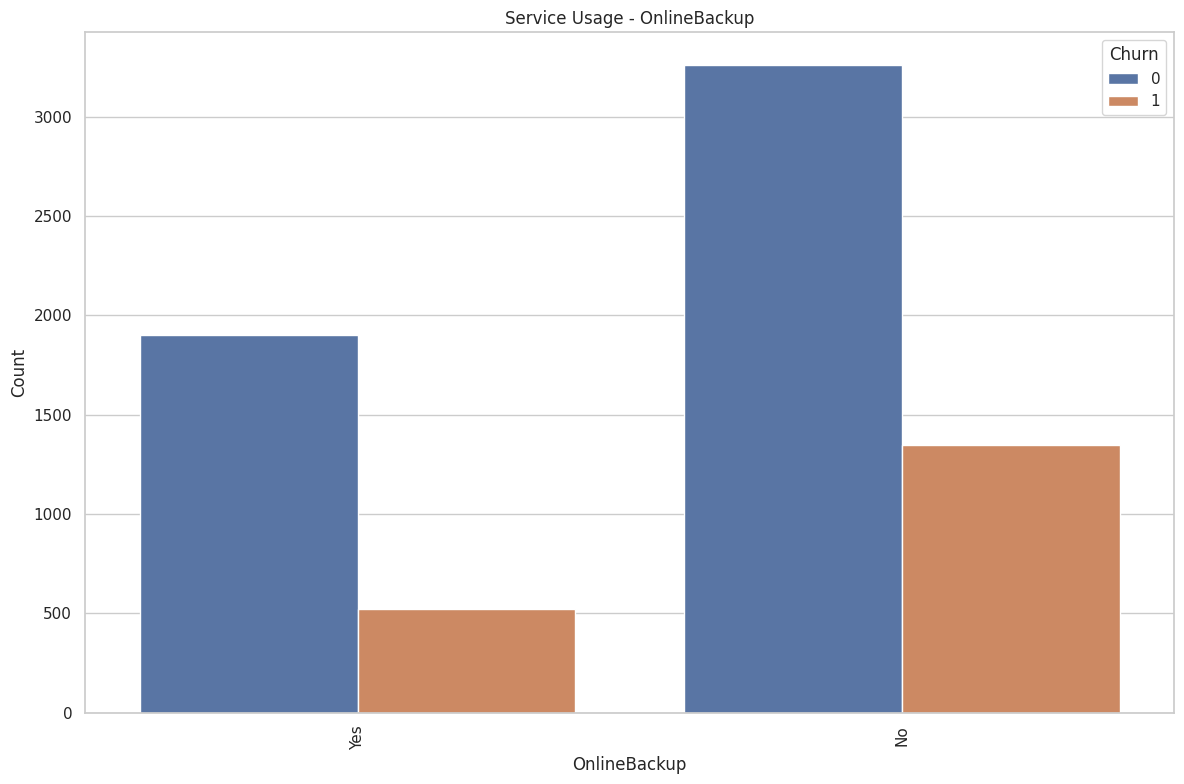

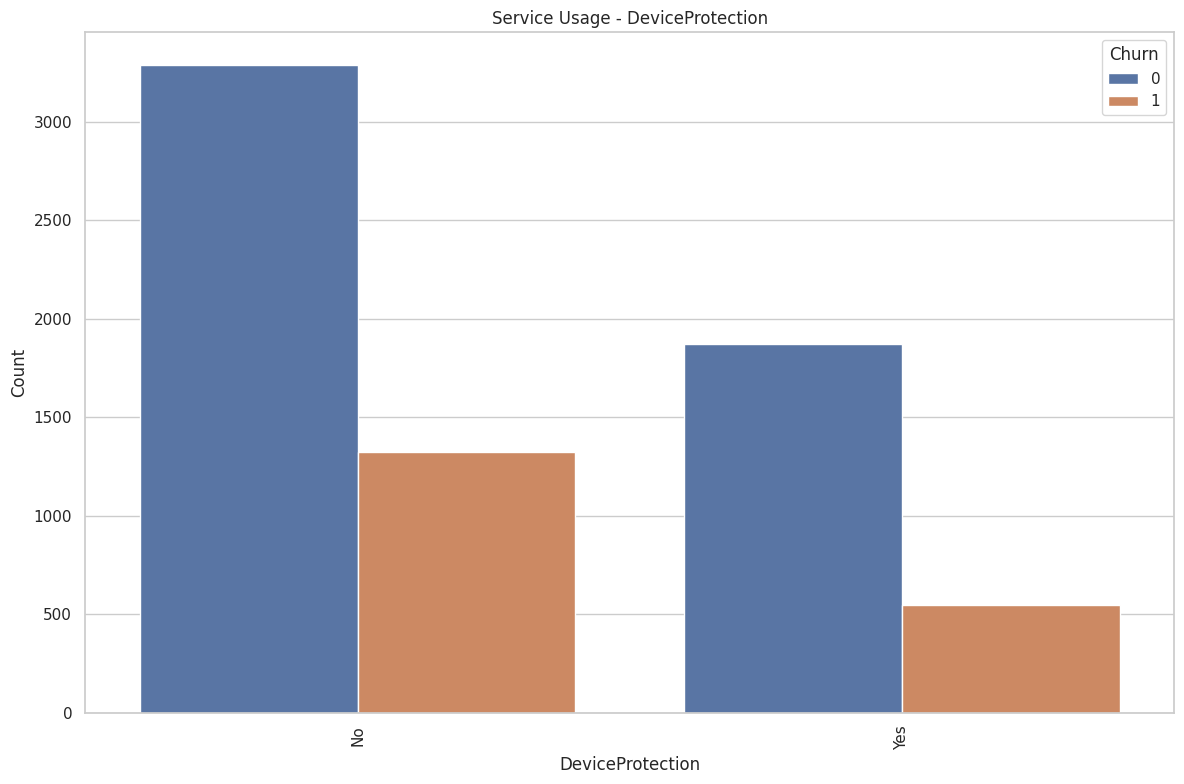

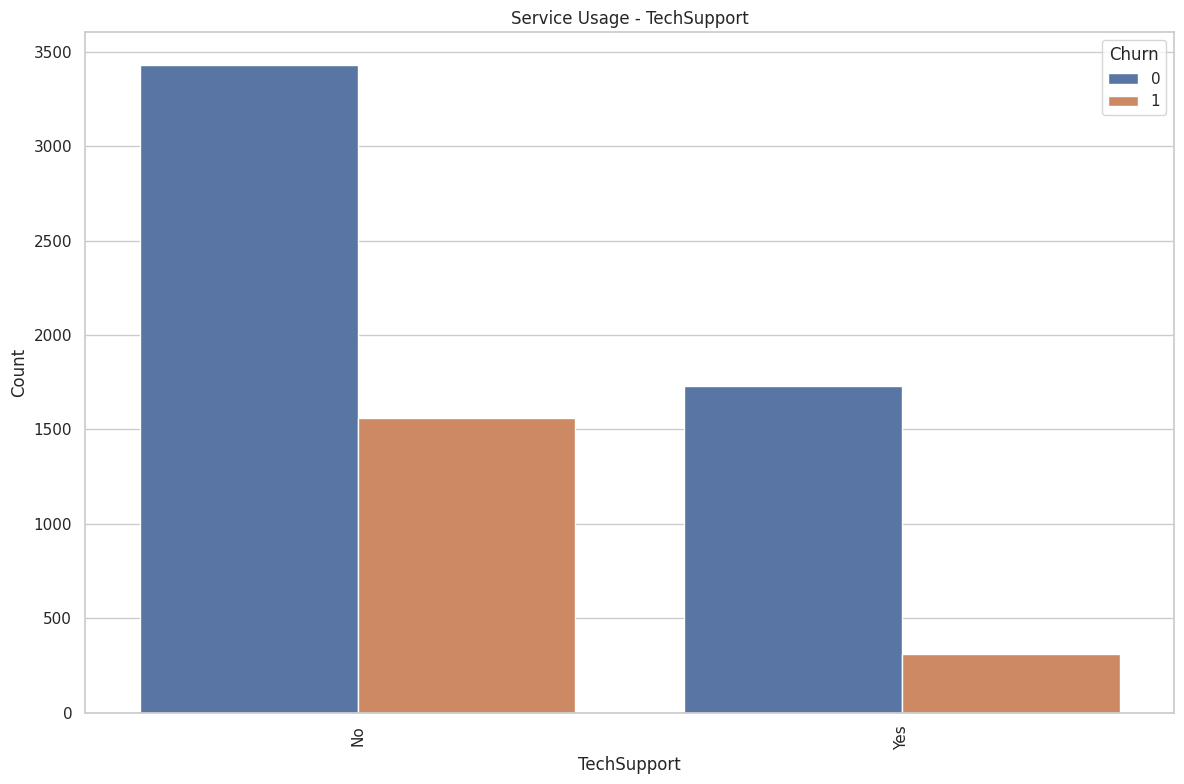

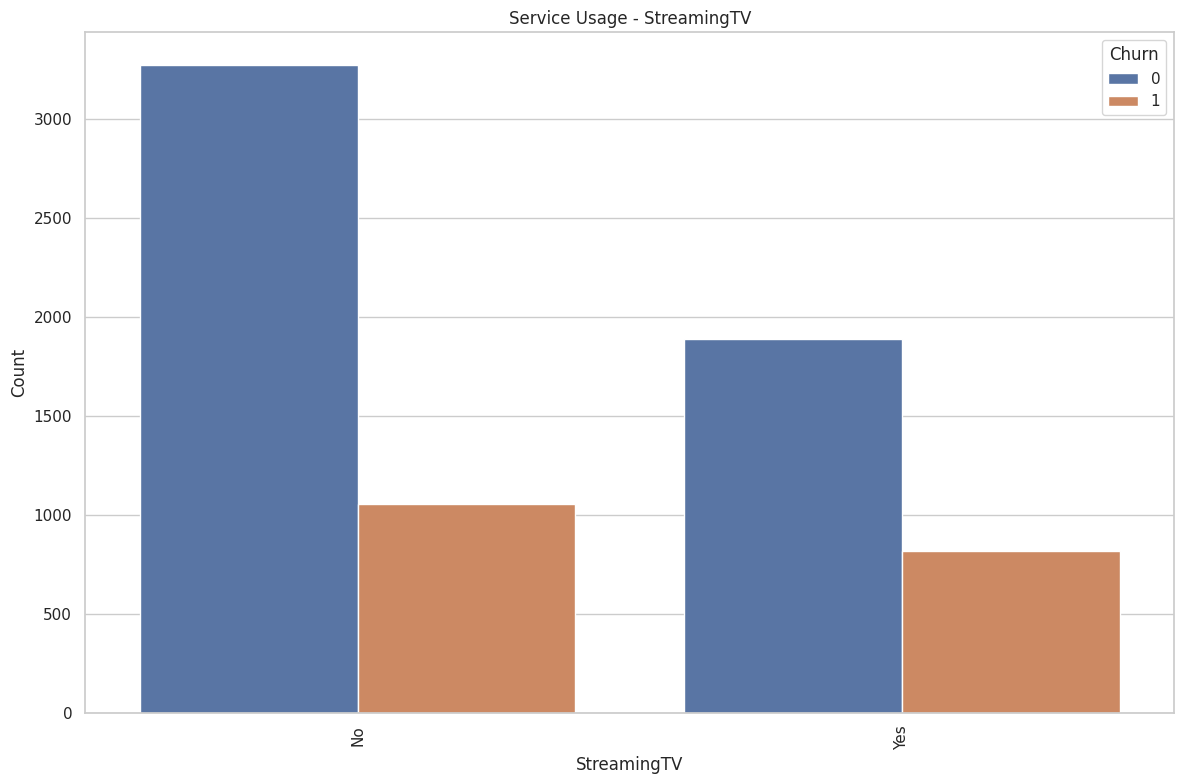

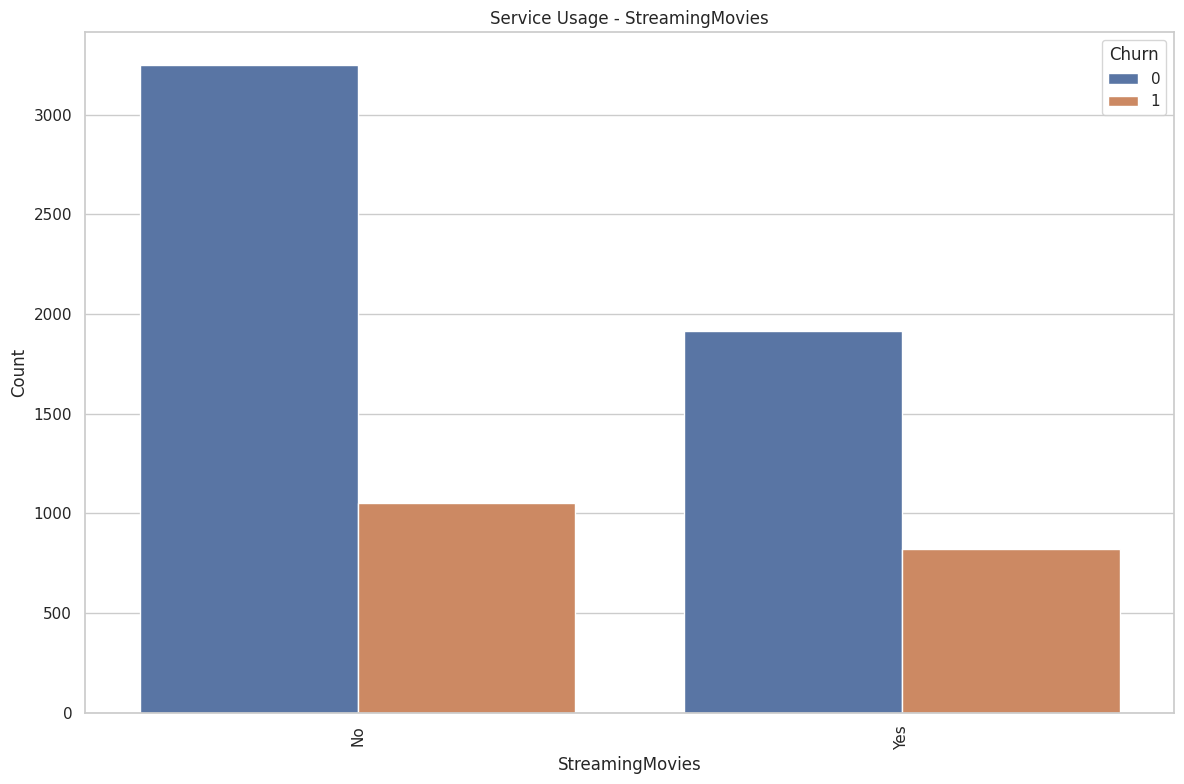

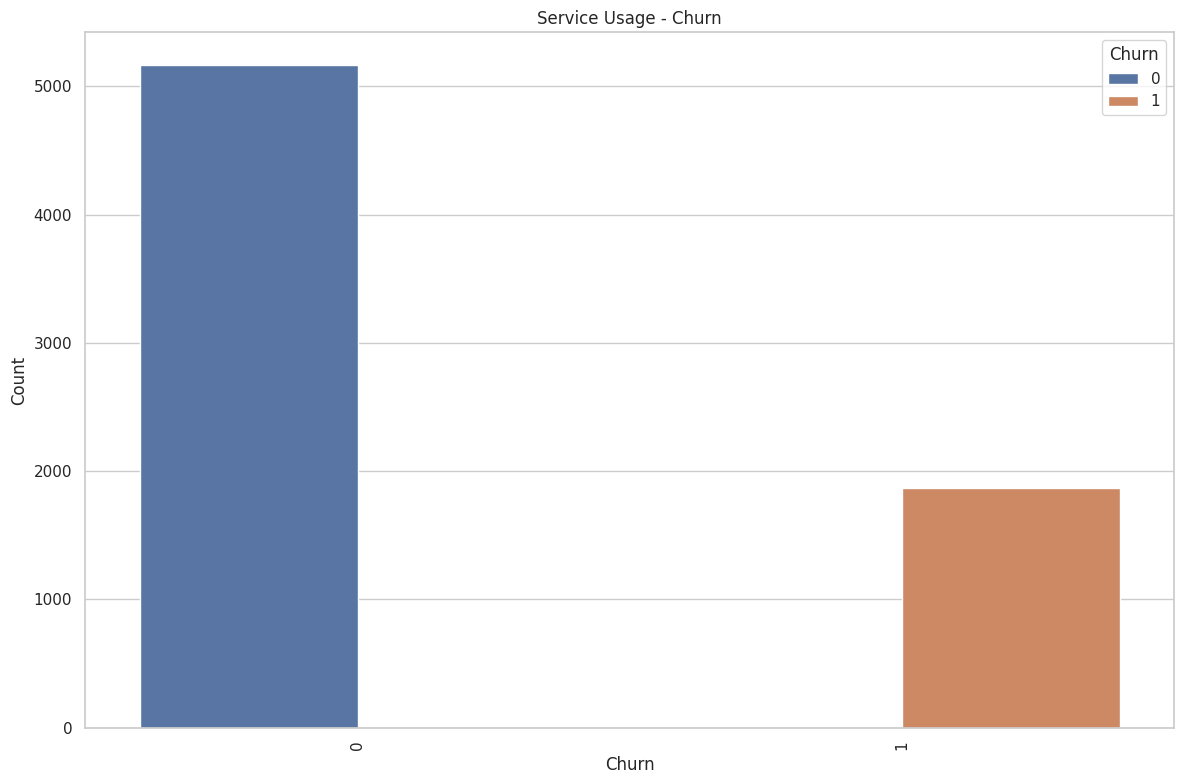

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Loop through service columns and create bar plots
for column in service_columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=service_df, hue='Churn', x=column)
    plt.title(f'Service Usage - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Ensure plots don't overlap
    plt.show()


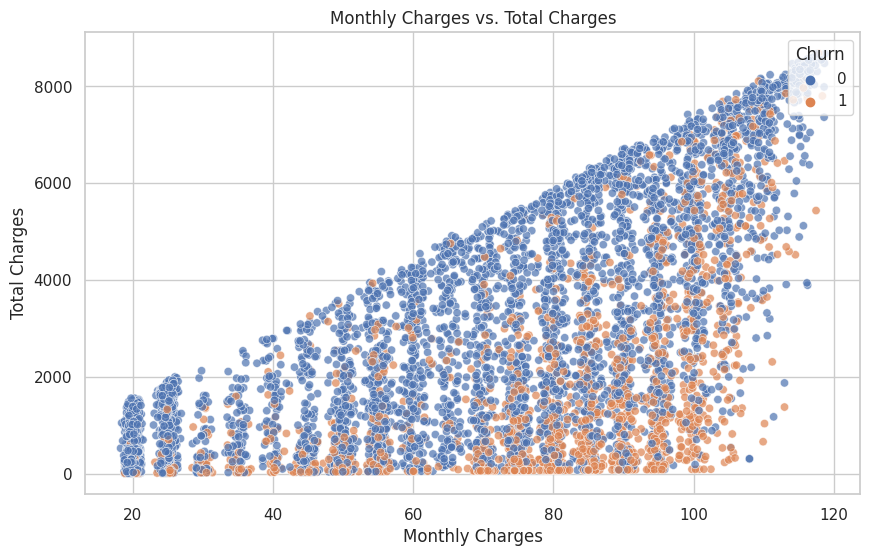

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a scatter plot of MonthlyCharges vs. TotalCharges
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.7)
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn', loc='upper right')
plt.show()


In [ ]:
# Create a contingency table of gender vs. churn
contingency_table = pd.crosstab(df['gender'], df['Churn'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Define significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-squared:", chi2)
print("p-value:", p)

if p < alpha:
    print("There is a significant difference between gender and churn rates.")
else:
    print("There is no significant difference between gender and churn rates.")


Chi-squared: 0.47545453727386294
p-value: 0.4904884707065509
There is no significant difference between gender and churn rates.


In [ ]:
# Create a contingency table of SeniorCitizen vs. Churn
contingency_table = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Define significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-squared:", chi2)
print("p-value:", p)

if p < alpha:
    print("There is a significant difference in churn rates between senior and non-senior citizens.")
else:
    print("There is no significant difference in churn rates between senior and non-senior citizens.")


Chi-squared: 158.4408162893713
p-value: 2.4792557203954705e-36
There is a significant difference in churn rates between senior and non-senior citizens.


In [ ]:
# Create a contingency table of Contract vs. Churn
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Define significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-squared:", chi2)
print("p-value:", p)

if p < alpha:
    print("There is a significant difference in churn rates based on contract type.")
else:
    print("There is no significant difference in churn rates based on contract type.")


Chi-squared: 1179.5458287339445
p-value: 7.326182186265472e-257
There is a significant difference in churn rates based on contract type.


In [ ]:
# Create a contingency table of PaymentMethod vs. Churn
contingency_table = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Define significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-squared:", chi2)
print("p-value:", p)

if p < alpha:
    print("There is a significant difference in churn rates based on payment method.")
else:
    print("There is no significant difference in churn rates based on payment method.")


Chi-squared: 645.4299001234638
p-value: 1.4263098511063342e-139
There is a significant difference in churn rates based on payment method.


In [ ]:
# Define tenure ranges and labels for tenure groups
tenure_ranges = [0, 12, 24, 36, 48, 60, 100]  # Customize these ranges
tenure_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61+']

# Create a new column 'TenureGroup' based on tenure ranges
df['TenureGroup'] = pd.cut(df['tenure'], bins=tenure_ranges, labels=tenure_labels, right=False)

# Print the first few rows to verify the new column
print(df[['tenure', 'TenureGroup']].head())


   tenure TenureGroup
0       1        0-12
1      34       25-36
2       2        0-12
3      45       37-48
4       2        0-12


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,25-36
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61+
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0-12
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,0-12


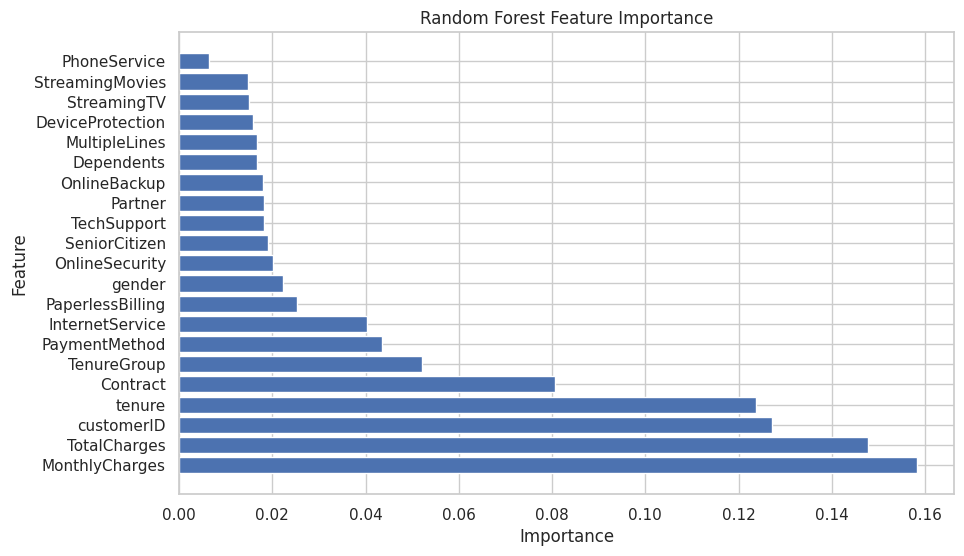

In [ ]:
# Copy the dataframe to avoid modifying the original
X = df.drop('Churn', axis=1)
X_encoded = X.copy()

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in X_encoded.columns:
    if X_encoded[column].dtype in ['object', 'category']:
        X_encoded[column] = label_encoder.fit_transform(X_encoded[column])

# Separate features (X) and target (y)
y = df['Churn']

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the data
rf_classifier.fit(X_encoded, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


In [ ]:
X_encoded

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureGroup
0,5365,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,2
2,2558,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,0
3,5524,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,3
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,4843,1,0,1,1,24,1,1,0,1,...,1,1,1,1,1,1,3,84.80,1990.50,2
7028,1524,0,0,1,1,72,1,1,1,0,...,1,0,1,1,1,1,1,103.20,7362.90,5
7029,3358,0,0,1,1,11,0,0,0,1,...,0,0,0,0,0,1,2,29.60,346.45,0
7030,5923,1,1,1,0,4,1,1,1,0,...,0,0,0,0,0,1,3,74.40,306.60,0


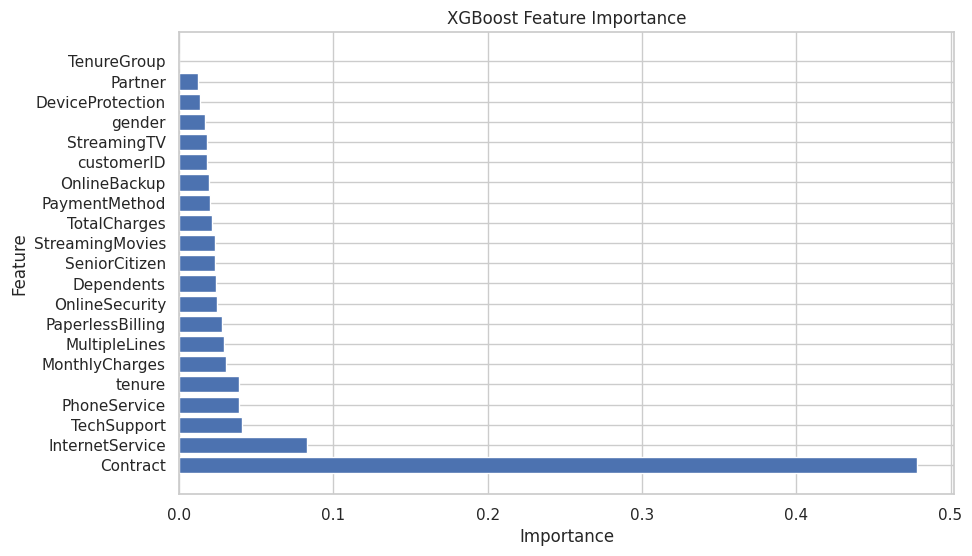

In [ ]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fit the model to the data
xgb_classifier.fit(X_encoded, y)

# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)
logreg_predictions = logreg_model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_report = classification_report(y_test, logreg_predictions)



In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)



In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_report = classification_report(y_test, xgb_predictions)

# Print accuracy and classification reports
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Report:\n", logreg_report)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Report:\n", rf_report)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Report:\n", xgb_report)


Logistic Regression Accuracy: 0.7931769722814499
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest Accuracy: 0.7974413646055437
Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407

XGBoost Accuracy: 0.7818052594171997
XGBoost Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      

In [ ]:
# Apply PCA to the scaled features
pca = PCA(n_components=5)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the PCA-transformed data
rf_classifier.fit(X_train_pca, y_train)
rf_predictions = rf_classifier.predict(X_test_pca)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print("Classification Report:\n", rf_report)


Random Forest Accuracy: 0.7619047619047619
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.57      0.45      0.50       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



In [ ]:
# Create the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7085998578535891
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.45      0.48      0.47       374

    accuracy                           0.71      1407
   macro avg       0.63      0.64      0.63      1407
weighted avg       0.71      0.71      0.71      1407

Confusion Matrix:
 [[818 215]
 [195 179]]


In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
dot_data = export_graphviz(model, out_file=None, feature_names=X_encoded.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('churn_decision_tree', format='png')  # This will save the tree visualization as a PNG file

# Display the Decision Tree visualization
graph.view()


Accuracy: 0.7007818052594172
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1033
           1       0.45      0.52      0.48       374

    accuracy                           0.70      1407
   macro avg       0.63      0.64      0.63      1407
weighted avg       0.72      0.70      0.71      1407

Confusion Matrix:
 [[792 241]
 [180 194]]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.42932 to fit


'churn_decision_tree.pdf'

In [ ]:
# Apply RobustScaler to features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.720682302771855
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1033
           1       0.48      0.57      0.52       374

    accuracy                           0.72      1407
   macro avg       0.66      0.67      0.66      1407
weighted avg       0.74      0.72      0.73      1407

Confusion Matrix:
 [[802 231]
 [162 212]]


In [ ]:
# Select specific columns from the X_encoded dataframe
selected_columns = ['MonthlyCharges', 'TotalCharges', 'customerID', 'tenure', 'Contract', 'TenureGroup', 'PaymentMethod', 'InternetService', 'PaperlessBilling', 'gender', 'OnlineSecurity', 'SeniorCitizen', 'TechSupport', 'Partner', 'OnlineBackup']
X = X_encoded[selected_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg_model_2 = LogisticRegression()
logreg_model_2.fit(X_train_scaled, y_train)
logreg_predictions_2 = logreg_model_2.predict(X_test_scaled)
logreg_accuracy_2 = accuracy_score(y_test, logreg_predictions_2)
logreg_report_2 = classification_report(y_test, logreg_predictions_2)



In [ ]:
# Print accuracy and classification reports
print("Logistic Regression Accuracy:", logreg_accuracy_2)
print("Logistic Regression Report:\n", logreg_report_2)

Logistic Regression Accuracy: 0.7924662402274343
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [ ]:
# Random Forest
rf_model_2 = RandomForestClassifier(random_state=42)
rf_model_2.fit(X_train_scaled, y_train)
rf_predictions_2 = rf_model_2.predict(X_test_scaled)
rf_accuracy_2 = accuracy_score(y_test, rf_predictions_2)
rf_report_2 = classification_report(y_test, rf_predictions_2)

print("Random Forest Accuracy:", rf_accuracy_2)
print("Random Forest Report:\n", rf_report_2)

Random Forest Accuracy: 0.7953091684434968
Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407

